In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer 
import re
import matplotlib.pyplot as plt

# Preprocessing

In [2]:
test_df = pd.read_csv("test_dataset_without_labels.csv", encoding='utf-16-le')
test_df

,vba_code
0,"Private Sub getCIA(C As String, I As String, A..."
1,Private Sub Workbook_Open()\n Application.C...
2,'APMP\n'KILL\nPrivate Sub Document_Open()\n ...
3,Private Sub Workbook_Activate()\n Call AddM...
4,Private Sub CheckBox1_Click()\n\nEnd Sub\n\nPr...
...,...
10625,Private Sub CommandButton1_Click()\nDim s As A...
10626,Sub AutoOpen()\n\nMyMacro\n\nEnd Sub\n\nSub Do...
10627,Private Sub CommandButton1_Click()\n With A...
10628,Private Const FOSMgcqLTaUItxmhNrJ As String = ...


In [3]:
validation_df = pd.read_csv("validation_dataset.csv", encoding='utf-16-le')
validation_df

,label,vba_code
0,mal,Function SleekM()\nOn Error Resume Next\n Se...
1,mal,'Option Explicit\nPrivate Sub Workbook_BeforeC...
2,white,"'Sub AutoExec() 'ð2¾(\n'ds = MsgBox(""#Wzh..."
3,white,Private Sub CommandButton1_Click()\nCall Clear...
4,mal,'Option Explicit\nPrivate Sub Workbook_BeforeC...
...,...,...
10624,mal,Sub Auto_Open()\nApplication.EnableCancelKey =...
10625,white,"Private Sub UserForm_Initialize()\nTXTpath = ""..."
10626,white,Private Sub SpinButton1_Change()\n\nEnd Sub\n\...
10627,mal,'Option Explicit\nPrivate Sub Workbook_BeforeC...


In [4]:
train_df = pd.read_csv("train_dataset.csv", encoding='utf-16-le')
train_df

,label,vba_code
0,white,Private Sub Workbook_BeforeClose(Cancel As Boo...
1,white,Option Explicit\nOption Explicit\nOption Expli...
2,mal,'Option Explicit\nPrivate Sub Workbook_BeforeC...
3,mal,'Option Explicit\nPrivate Sub Workbook_BeforeC...
4,mal,'Option Explicit\nPrivate Sub Workbook_BeforeC...
...,...,...
31883,mal,'Option Explicit\nPrivate Sub Workbook_BeforeC...
31884,white,Option Explicit\n\nPrivate Sub Workbook_Open()...
31885,white,Option Explicit\n\nPrivate Sub CFixPicture_Act...
31886,mal,'Option Explicit\nPrivate Sub Workbook_BeforeC...


In [5]:
np.unique(train_df.label) 

array(['mal', 'white'], dtype=object)

In [6]:
train_df.vba_code

0        Private Sub Workbook_BeforeClose(Cancel As Boo...
1        Option Explicit\nOption Explicit\nOption Expli...
2        'Option Explicit\nPrivate Sub Workbook_BeforeC...
3        'Option Explicit\nPrivate Sub Workbook_BeforeC...
4        'Option Explicit\nPrivate Sub Workbook_BeforeC...
                               ...                        
31883    'Option Explicit\nPrivate Sub Workbook_BeforeC...
31884    Option Explicit\n\nPrivate Sub Workbook_Open()...
31885    Option Explicit\n\nPrivate Sub CFixPicture_Act...
31886    'Option Explicit\nPrivate Sub Workbook_BeforeC...
31887    'Option Explicit\nPrivate Sub Workbook_BeforeC...
Name: vba_code, Length: 31888, dtype: object

In [7]:
# train_df.vba_code[2]

In [8]:
def tfidf_features(data, n_grams=2):   
    vectorizer = TfidfVectorizer(ngram_range=(n_grams, n_grams)) 
    X = vectorizer.fit_transform(data)

    print("Feature names with n-gram word: ", vectorizer.get_feature_names_out())
#     print("Vectorizer Matrix (Sparse): ")
#     print(X)

In [9]:
# not good with big data
tfidf_features(train_df.vba_code, 2)

Feature names with n-gram word:  ['00 00' '00 000' '00 0000' ... 'ÿâ cz' 'ÿån nn' 'ÿånnxýoïk kð']


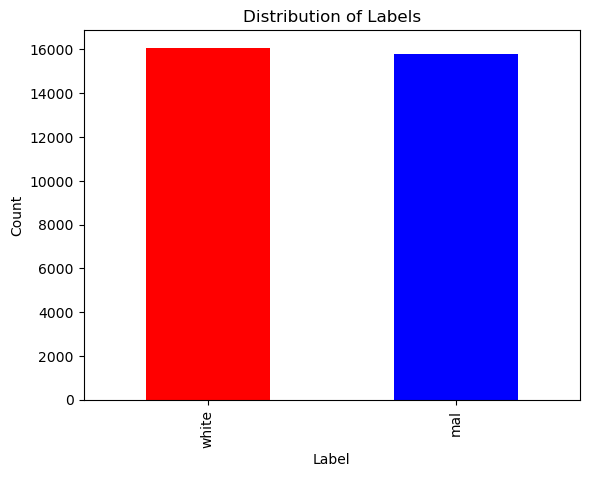

In [10]:
# Assuming 'label' is the column containing 'mal' and 'white' values
label_counts = train_df['label'].value_counts()

# Plotting the counts
label_counts.plot(kind='bar', color=['red', 'blue'])
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [11]:
# Assuming train_df is your DataFrame
duplicates = train_df[train_df.duplicated()]

# Check if there are any duplicates
if duplicates.shape[0] > 0:
    print("Duplicate rows found!")
    print(duplicates)
else:
    print("No duplicates found.")


Duplicate rows found!
       label                                           vba_code
3        mal  'Option Explicit\nPrivate Sub Workbook_BeforeC...
4        mal  'Option Explicit\nPrivate Sub Workbook_BeforeC...
7        mal  'Option Explicit\nPrivate Sub Workbook_BeforeC...
15       mal  'Option Explicit\nPrivate Sub Workbook_BeforeC...
18       mal  'Option Explicit\nPrivate Sub Workbook_BeforeC...
...      ...                                                ...
31882    mal  'Option Explicit\nPrivate Sub Workbook_BeforeC...
31883    mal  'Option Explicit\nPrivate Sub Workbook_BeforeC...
31884  white  Option Explicit\n\nPrivate Sub Workbook_Open()...
31886    mal  'Option Explicit\nPrivate Sub Workbook_BeforeC...
31887    mal  'Option Explicit\nPrivate Sub Workbook_BeforeC...

[24489 rows x 2 columns]


In [12]:
# # Remove all duplicate rows based on all columns
# train_df.drop_duplicates(inplace=True)

# # If you want to remove duplicates based on specific columns, you can use the subset parameter
# # For example, to remove duplicates based on the 'vba_code' column:
# train_df.drop_duplicates(subset=['vba_code'], inplace=True)
# train_df

In [13]:
# # Assuming 'label' is the column containing 'mal' and 'white' values
# label_counts = train_df['label'].value_counts()

# # Plotting the counts
# label_counts.plot(kind='bar', color=['red', 'blue'])
# plt.title('Distribution of Labels')
# plt.xlabel('Label')
# plt.ylabel('Count')
# plt.show()

### Extracting features

In [14]:
# Remove comments
train_df['vba_code_without_comments'] = train_df['vba_code'].apply(lambda x: re.sub(r"'.*?$", "", x, flags=re.MULTILINE))
train_df

,label,vba_code,vba_code_without_comments
0,white,Private Sub Workbook_BeforeClose(Cancel As Boo...,Private Sub Workbook_BeforeClose(Cancel As Boo...
1,white,Option Explicit\nOption Explicit\nOption Expli...,Option Explicit\nOption Explicit\nOption Expli...
2,mal,'Option Explicit\nPrivate Sub Workbook_BeforeC...,\nPrivate Sub Workbook_BeforeClose(Cancel As B...
3,mal,'Option Explicit\nPrivate Sub Workbook_BeforeC...,\nPrivate Sub Workbook_BeforeClose(Cancel As B...
4,mal,'Option Explicit\nPrivate Sub Workbook_BeforeC...,\nPrivate Sub Workbook_BeforeClose(Cancel As B...
...,...,...,...
31883,mal,'Option Explicit\nPrivate Sub Workbook_BeforeC...,\nPrivate Sub Workbook_BeforeClose(Cancel As B...
31884,white,Option Explicit\n\nPrivate Sub Workbook_Open()...,Option Explicit\n\nPrivate Sub Workbook_Open()...
31885,white,Option Explicit\n\nPrivate Sub CFixPicture_Act...,Option Explicit\n\nPrivate Sub CFixPicture_Act...
31886,mal,'Option Explicit\nPrivate Sub Workbook_BeforeC...,\nPrivate Sub Workbook_BeforeClose(Cancel As B...


In [15]:
# make one clean line
def clean_script(script):
    # Remove special characters and reduce consecutive spaces
    cleaned_script = re.sub(r'\s+', ' ', script)
    # Remove tabs and newlines
    cleaned_script = cleaned_script.replace('\t', '').replace('\n', '')
    # Remove punctuation and convert to lowercase
    cleaned_script = re.sub(r'[^\w\s]', '', cleaned_script).lower()
    return cleaned_script

In [16]:
# Apply the cleaning function to the 'vba_code' column
train_df['cleaned_vba_code'] = train_df['vba_code_without_comments'].apply(clean_script)
train_df

,label,vba_code,vba_code_without_comments,cleaned_vba_code
0,white,Private Sub Workbook_BeforeClose(Cancel As Boo...,Private Sub Workbook_BeforeClose(Cancel As Boo...,private sub workbook_beforeclosecancel as bool...
1,white,Option Explicit\nOption Explicit\nOption Expli...,Option Explicit\nOption Explicit\nOption Expli...,option explicit option explicit option explici...
2,mal,'Option Explicit\nPrivate Sub Workbook_BeforeC...,\nPrivate Sub Workbook_BeforeClose(Cancel As B...,private sub workbook_beforeclosecancel as boo...
3,mal,'Option Explicit\nPrivate Sub Workbook_BeforeC...,\nPrivate Sub Workbook_BeforeClose(Cancel As B...,private sub workbook_beforeclosecancel as boo...
4,mal,'Option Explicit\nPrivate Sub Workbook_BeforeC...,\nPrivate Sub Workbook_BeforeClose(Cancel As B...,private sub workbook_beforeclosecancel as boo...
...,...,...,...,...
31883,mal,'Option Explicit\nPrivate Sub Workbook_BeforeC...,\nPrivate Sub Workbook_BeforeClose(Cancel As B...,private sub workbook_beforeclosecancel as boo...
31884,white,Option Explicit\n\nPrivate Sub Workbook_Open()...,Option Explicit\n\nPrivate Sub Workbook_Open()...,option explicit private sub workbook_open appl...
31885,white,Option Explicit\n\nPrivate Sub CFixPicture_Act...,Option Explicit\n\nPrivate Sub CFixPicture_Act...,option explicit private sub cfixpicture_activa...
31886,mal,'Option Explicit\nPrivate Sub Workbook_BeforeC...,\nPrivate Sub Workbook_BeforeClose(Cancel As B...,private sub workbook_beforeclosecancel as boo...


In [17]:
# Text Length
train_df['code_length'] = train_df['vba_code'].apply(len)
train_df

,label,vba_code,vba_code_without_comments,cleaned_vba_code,code_length
0,white,Private Sub Workbook_BeforeClose(Cancel As Boo...,Private Sub Workbook_BeforeClose(Cancel As Boo...,private sub workbook_beforeclosecancel as bool...,1070
1,white,Option Explicit\nOption Explicit\nOption Expli...,Option Explicit\nOption Explicit\nOption Expli...,option explicit option explicit option explici...,13092
2,mal,'Option Explicit\nPrivate Sub Workbook_BeforeC...,\nPrivate Sub Workbook_BeforeClose(Cancel As B...,private sub workbook_beforeclosecancel as boo...,3428
3,mal,'Option Explicit\nPrivate Sub Workbook_BeforeC...,\nPrivate Sub Workbook_BeforeClose(Cancel As B...,private sub workbook_beforeclosecancel as boo...,3428
4,mal,'Option Explicit\nPrivate Sub Workbook_BeforeC...,\nPrivate Sub Workbook_BeforeClose(Cancel As B...,private sub workbook_beforeclosecancel as boo...,3428
...,...,...,...,...,...
31883,mal,'Option Explicit\nPrivate Sub Workbook_BeforeC...,\nPrivate Sub Workbook_BeforeClose(Cancel As B...,private sub workbook_beforeclosecancel as boo...,3428
31884,white,Option Explicit\n\nPrivate Sub Workbook_Open()...,Option Explicit\n\nPrivate Sub Workbook_Open()...,option explicit private sub workbook_open appl...,12274
31885,white,Option Explicit\n\nPrivate Sub CFixPicture_Act...,Option Explicit\n\nPrivate Sub CFixPicture_Act...,option explicit private sub cfixpicture_activa...,1000
31886,mal,'Option Explicit\nPrivate Sub Workbook_BeforeC...,\nPrivate Sub Workbook_BeforeClose(Cancel As B...,private sub workbook_beforeclosecancel as boo...,3428


In [18]:
# Number of Linens
train_df['num_lines'] = train_df['vba_code'].apply(lambda x: x.count('\n') + 1)
train_df

,label,vba_code,vba_code_without_comments,cleaned_vba_code,code_length,num_lines
0,white,Private Sub Workbook_BeforeClose(Cancel As Boo...,Private Sub Workbook_BeforeClose(Cancel As Boo...,private sub workbook_beforeclosecancel as bool...,1070,34
1,white,Option Explicit\nOption Explicit\nOption Expli...,Option Explicit\nOption Explicit\nOption Expli...,option explicit option explicit option explici...,13092,420
2,mal,'Option Explicit\nPrivate Sub Workbook_BeforeC...,\nPrivate Sub Workbook_BeforeClose(Cancel As B...,private sub workbook_beforeclosecancel as boo...,3428,86
3,mal,'Option Explicit\nPrivate Sub Workbook_BeforeC...,\nPrivate Sub Workbook_BeforeClose(Cancel As B...,private sub workbook_beforeclosecancel as boo...,3428,86
4,mal,'Option Explicit\nPrivate Sub Workbook_BeforeC...,\nPrivate Sub Workbook_BeforeClose(Cancel As B...,private sub workbook_beforeclosecancel as boo...,3428,86
...,...,...,...,...,...,...
31883,mal,'Option Explicit\nPrivate Sub Workbook_BeforeC...,\nPrivate Sub Workbook_BeforeClose(Cancel As B...,private sub workbook_beforeclosecancel as boo...,3428,86
31884,white,Option Explicit\n\nPrivate Sub Workbook_Open()...,Option Explicit\n\nPrivate Sub Workbook_Open()...,option explicit private sub workbook_open appl...,12274,402
31885,white,Option Explicit\n\nPrivate Sub CFixPicture_Act...,Option Explicit\n\nPrivate Sub CFixPicture_Act...,option explicit private sub cfixpicture_activa...,1000,42
31886,mal,'Option Explicit\nPrivate Sub Workbook_BeforeC...,\nPrivate Sub Workbook_BeforeClose(Cancel As B...,private sub workbook_beforeclosecancel as boo...,3428,86


In [19]:
# Syntax Complexity: average number of characters per line
train_df['avg_chars_per_line'] = train_df.apply(lambda row: row['code_length'] / row['num_lines'] if row['num_lines'] > 0 else 0, axis=1)
train_df

,label,vba_code,vba_code_without_comments,cleaned_vba_code,code_length,num_lines,avg_chars_per_line
0,white,Private Sub Workbook_BeforeClose(Cancel As Boo...,Private Sub Workbook_BeforeClose(Cancel As Boo...,private sub workbook_beforeclosecancel as bool...,1070,34,31.470588
1,white,Option Explicit\nOption Explicit\nOption Expli...,Option Explicit\nOption Explicit\nOption Expli...,option explicit option explicit option explici...,13092,420,31.171429
2,mal,'Option Explicit\nPrivate Sub Workbook_BeforeC...,\nPrivate Sub Workbook_BeforeClose(Cancel As B...,private sub workbook_beforeclosecancel as boo...,3428,86,39.860465
3,mal,'Option Explicit\nPrivate Sub Workbook_BeforeC...,\nPrivate Sub Workbook_BeforeClose(Cancel As B...,private sub workbook_beforeclosecancel as boo...,3428,86,39.860465
4,mal,'Option Explicit\nPrivate Sub Workbook_BeforeC...,\nPrivate Sub Workbook_BeforeClose(Cancel As B...,private sub workbook_beforeclosecancel as boo...,3428,86,39.860465
...,...,...,...,...,...,...,...
31883,mal,'Option Explicit\nPrivate Sub Workbook_BeforeC...,\nPrivate Sub Workbook_BeforeClose(Cancel As B...,private sub workbook_beforeclosecancel as boo...,3428,86,39.860465
31884,white,Option Explicit\n\nPrivate Sub Workbook_Open()...,Option Explicit\n\nPrivate Sub Workbook_Open()...,option explicit private sub workbook_open appl...,12274,402,30.532338
31885,white,Option Explicit\n\nPrivate Sub CFixPicture_Act...,Option Explicit\n\nPrivate Sub CFixPicture_Act...,option explicit private sub cfixpicture_activa...,1000,42,23.809524
31886,mal,'Option Explicit\nPrivate Sub Workbook_BeforeC...,\nPrivate Sub Workbook_BeforeClose(Cancel As B...,private sub workbook_beforeclosecancel as boo...,3428,86,39.860465


In [20]:
# Use of Punctuation
train_df['num_exclamation_marks'] = train_df.apply(lambda row: row['vba_code'].count('!') / row['code_length'] if row['code_length'] > 0 else 0, axis=1)
train_df

,label,vba_code,vba_code_without_comments,cleaned_vba_code,code_length,num_lines,avg_chars_per_line,num_exclamation_marks
0,white,Private Sub Workbook_BeforeClose(Cancel As Boo...,Private Sub Workbook_BeforeClose(Cancel As Boo...,private sub workbook_beforeclosecancel as bool...,1070,34,31.470588,0.000000
1,white,Option Explicit\nOption Explicit\nOption Expli...,Option Explicit\nOption Explicit\nOption Expli...,option explicit option explicit option explici...,13092,420,31.171429,0.000229
2,mal,'Option Explicit\nPrivate Sub Workbook_BeforeC...,\nPrivate Sub Workbook_BeforeClose(Cancel As B...,private sub workbook_beforeclosecancel as boo...,3428,86,39.860465,0.002042
3,mal,'Option Explicit\nPrivate Sub Workbook_BeforeC...,\nPrivate Sub Workbook_BeforeClose(Cancel As B...,private sub workbook_beforeclosecancel as boo...,3428,86,39.860465,0.002042
4,mal,'Option Explicit\nPrivate Sub Workbook_BeforeC...,\nPrivate Sub Workbook_BeforeClose(Cancel As B...,private sub workbook_beforeclosecancel as boo...,3428,86,39.860465,0.002042
...,...,...,...,...,...,...,...,...
31883,mal,'Option Explicit\nPrivate Sub Workbook_BeforeC...,\nPrivate Sub Workbook_BeforeClose(Cancel As B...,private sub workbook_beforeclosecancel as boo...,3428,86,39.860465,0.002042
31884,white,Option Explicit\n\nPrivate Sub Workbook_Open()...,Option Explicit\n\nPrivate Sub Workbook_Open()...,option explicit private sub workbook_open appl...,12274,402,30.532338,0.000244
31885,white,Option Explicit\n\nPrivate Sub CFixPicture_Act...,Option Explicit\n\nPrivate Sub CFixPicture_Act...,option explicit private sub cfixpicture_activa...,1000,42,23.809524,0.000000
31886,mal,'Option Explicit\nPrivate Sub Workbook_BeforeC...,\nPrivate Sub Workbook_BeforeClose(Cancel As B...,private sub workbook_beforeclosecancel as boo...,3428,86,39.860465,0.002042


In [21]:
# Language Features
train_df['num_loops'] = train_df['vba_code'].apply(lambda x: x.count('For') + x.count('While'))
train_df

,label,vba_code,vba_code_without_comments,cleaned_vba_code,code_length,num_lines,avg_chars_per_line,num_exclamation_marks,num_loops
0,white,Private Sub Workbook_BeforeClose(Cancel As Boo...,Private Sub Workbook_BeforeClose(Cancel As Boo...,private sub workbook_beforeclosecancel as bool...,1070,34,31.470588,0.000000,0
1,white,Option Explicit\nOption Explicit\nOption Expli...,Option Explicit\nOption Explicit\nOption Expli...,option explicit option explicit option explici...,13092,420,31.171429,0.000229,23
2,mal,'Option Explicit\nPrivate Sub Workbook_BeforeC...,\nPrivate Sub Workbook_BeforeClose(Cancel As B...,private sub workbook_beforeclosecancel as boo...,3428,86,39.860465,0.002042,1
3,mal,'Option Explicit\nPrivate Sub Workbook_BeforeC...,\nPrivate Sub Workbook_BeforeClose(Cancel As B...,private sub workbook_beforeclosecancel as boo...,3428,86,39.860465,0.002042,1
4,mal,'Option Explicit\nPrivate Sub Workbook_BeforeC...,\nPrivate Sub Workbook_BeforeClose(Cancel As B...,private sub workbook_beforeclosecancel as boo...,3428,86,39.860465,0.002042,1
...,...,...,...,...,...,...,...,...,...
31883,mal,'Option Explicit\nPrivate Sub Workbook_BeforeC...,\nPrivate Sub Workbook_BeforeClose(Cancel As B...,private sub workbook_beforeclosecancel as boo...,3428,86,39.860465,0.002042,1
31884,white,Option Explicit\n\nPrivate Sub Workbook_Open()...,Option Explicit\n\nPrivate Sub Workbook_Open()...,option explicit private sub workbook_open appl...,12274,402,30.532338,0.000244,23
31885,white,Option Explicit\n\nPrivate Sub CFixPicture_Act...,Option Explicit\n\nPrivate Sub CFixPicture_Act...,option explicit private sub cfixpicture_activa...,1000,42,23.809524,0.000000,0
31886,mal,'Option Explicit\nPrivate Sub Workbook_BeforeC...,\nPrivate Sub Workbook_BeforeClose(Cancel As B...,private sub workbook_beforeclosecancel as boo...,3428,86,39.860465,0.002042,1


In [22]:
# Loops per Character Length
train_df['num_loops_length'] = train_df.apply(lambda row: (row['vba_code'].count('For ') + row['vba_code'].count('While')) / row['code_length'] if row['code_length'] > 0 else 0, axis=1)
train_df

,label,vba_code,vba_code_without_comments,cleaned_vba_code,code_length,num_lines,avg_chars_per_line,num_exclamation_marks,num_loops,num_loops_length
0,white,Private Sub Workbook_BeforeClose(Cancel As Boo...,Private Sub Workbook_BeforeClose(Cancel As Boo...,private sub workbook_beforeclosecancel as bool...,1070,34,31.470588,0.000000,0,0.000000
1,white,Option Explicit\nOption Explicit\nOption Expli...,Option Explicit\nOption Explicit\nOption Expli...,option explicit option explicit option explici...,13092,420,31.171429,0.000229,23,0.000687
2,mal,'Option Explicit\nPrivate Sub Workbook_BeforeC...,\nPrivate Sub Workbook_BeforeClose(Cancel As B...,private sub workbook_beforeclosecancel as boo...,3428,86,39.860465,0.002042,1,0.000292
3,mal,'Option Explicit\nPrivate Sub Workbook_BeforeC...,\nPrivate Sub Workbook_BeforeClose(Cancel As B...,private sub workbook_beforeclosecancel as boo...,3428,86,39.860465,0.002042,1,0.000292
4,mal,'Option Explicit\nPrivate Sub Workbook_BeforeC...,\nPrivate Sub Workbook_BeforeClose(Cancel As B...,private sub workbook_beforeclosecancel as boo...,3428,86,39.860465,0.002042,1,0.000292
...,...,...,...,...,...,...,...,...,...,...
31883,mal,'Option Explicit\nPrivate Sub Workbook_BeforeC...,\nPrivate Sub Workbook_BeforeClose(Cancel As B...,private sub workbook_beforeclosecancel as boo...,3428,86,39.860465,0.002042,1,0.000292
31884,white,Option Explicit\n\nPrivate Sub Workbook_Open()...,Option Explicit\n\nPrivate Sub Workbook_Open()...,option explicit private sub workbook_open appl...,12274,402,30.532338,0.000244,23,0.000081
31885,white,Option Explicit\n\nPrivate Sub CFixPicture_Act...,Option Explicit\n\nPrivate Sub CFixPicture_Act...,option explicit private sub cfixpicture_activa...,1000,42,23.809524,0.000000,0,0.000000
31886,mal,'Option Explicit\nPrivate Sub Workbook_BeforeC...,\nPrivate Sub Workbook_BeforeClose(Cancel As B...,private sub workbook_beforeclosecancel as boo...,3428,86,39.860465,0.002042,1,0.000292


In [23]:
# Function/Procedure Count
train_df['num_functions'] = train_df['vba_code'].apply(lambda x: x.count('Sub ') + x.count('Function '))
train_df

,label,vba_code,vba_code_without_comments,cleaned_vba_code,code_length,num_lines,avg_chars_per_line,num_exclamation_marks,num_loops,num_loops_length,num_functions
0,white,Private Sub Workbook_BeforeClose(Cancel As Boo...,Private Sub Workbook_BeforeClose(Cancel As Boo...,private sub workbook_beforeclosecancel as bool...,1070,34,31.470588,0.000000,0,0.000000,4
1,white,Option Explicit\nOption Explicit\nOption Expli...,Option Explicit\nOption Explicit\nOption Expli...,option explicit option explicit option explici...,13092,420,31.171429,0.000229,23,0.000687,29
2,mal,'Option Explicit\nPrivate Sub Workbook_BeforeC...,\nPrivate Sub Workbook_BeforeClose(Cancel As B...,private sub workbook_beforeclosecancel as boo...,3428,86,39.860465,0.002042,1,0.000292,8
3,mal,'Option Explicit\nPrivate Sub Workbook_BeforeC...,\nPrivate Sub Workbook_BeforeClose(Cancel As B...,private sub workbook_beforeclosecancel as boo...,3428,86,39.860465,0.002042,1,0.000292,8
4,mal,'Option Explicit\nPrivate Sub Workbook_BeforeC...,\nPrivate Sub Workbook_BeforeClose(Cancel As B...,private sub workbook_beforeclosecancel as boo...,3428,86,39.860465,0.002042,1,0.000292,8
...,...,...,...,...,...,...,...,...,...,...,...
31883,mal,'Option Explicit\nPrivate Sub Workbook_BeforeC...,\nPrivate Sub Workbook_BeforeClose(Cancel As B...,private sub workbook_beforeclosecancel as boo...,3428,86,39.860465,0.002042,1,0.000292,8
31884,white,Option Explicit\n\nPrivate Sub Workbook_Open()...,Option Explicit\n\nPrivate Sub Workbook_Open()...,option explicit private sub workbook_open appl...,12274,402,30.532338,0.000244,23,0.000081,41
31885,white,Option Explicit\n\nPrivate Sub CFixPicture_Act...,Option Explicit\n\nPrivate Sub CFixPicture_Act...,option explicit private sub cfixpicture_activa...,1000,42,23.809524,0.000000,0,0.000000,6
31886,mal,'Option Explicit\nPrivate Sub Workbook_BeforeC...,\nPrivate Sub Workbook_BeforeClose(Cancel As B...,private sub workbook_beforeclosecancel as boo...,3428,86,39.860465,0.002042,1,0.000292,8


In [24]:
# Functions per Character Length:
train_df['num_functions'] = train_df.apply(lambda row: (row['vba_code'].count('Sub ') + row['vba_code'].count('Function ')) / row['code_length'] if row['code_length'] > 0 else 0, axis=1)
train_df

,label,vba_code,vba_code_without_comments,cleaned_vba_code,code_length,num_lines,avg_chars_per_line,num_exclamation_marks,num_loops,num_loops_length,num_functions
0,white,Private Sub Workbook_BeforeClose(Cancel As Boo...,Private Sub Workbook_BeforeClose(Cancel As Boo...,private sub workbook_beforeclosecancel as bool...,1070,34,31.470588,0.000000,0,0.000000,0.003738
1,white,Option Explicit\nOption Explicit\nOption Expli...,Option Explicit\nOption Explicit\nOption Expli...,option explicit option explicit option explici...,13092,420,31.171429,0.000229,23,0.000687,0.002215
2,mal,'Option Explicit\nPrivate Sub Workbook_BeforeC...,\nPrivate Sub Workbook_BeforeClose(Cancel As B...,private sub workbook_beforeclosecancel as boo...,3428,86,39.860465,0.002042,1,0.000292,0.002334
3,mal,'Option Explicit\nPrivate Sub Workbook_BeforeC...,\nPrivate Sub Workbook_BeforeClose(Cancel As B...,private sub workbook_beforeclosecancel as boo...,3428,86,39.860465,0.002042,1,0.000292,0.002334
4,mal,'Option Explicit\nPrivate Sub Workbook_BeforeC...,\nPrivate Sub Workbook_BeforeClose(Cancel As B...,private sub workbook_beforeclosecancel as boo...,3428,86,39.860465,0.002042,1,0.000292,0.002334
...,...,...,...,...,...,...,...,...,...,...,...
31883,mal,'Option Explicit\nPrivate Sub Workbook_BeforeC...,\nPrivate Sub Workbook_BeforeClose(Cancel As B...,private sub workbook_beforeclosecancel as boo...,3428,86,39.860465,0.002042,1,0.000292,0.002334
31884,white,Option Explicit\n\nPrivate Sub Workbook_Open()...,Option Explicit\n\nPrivate Sub Workbook_Open()...,option explicit private sub workbook_open appl...,12274,402,30.532338,0.000244,23,0.000081,0.003340
31885,white,Option Explicit\n\nPrivate Sub CFixPicture_Act...,Option Explicit\n\nPrivate Sub CFixPicture_Act...,option explicit private sub cfixpicture_activa...,1000,42,23.809524,0.000000,0,0.000000,0.006000
31886,mal,'Option Explicit\nPrivate Sub Workbook_BeforeC...,\nPrivate Sub Workbook_BeforeClose(Cancel As B...,private sub workbook_beforeclosecancel as boo...,3428,86,39.860465,0.002042,1,0.000292,0.002334


In [25]:
# Numeric Literal Count (using regular expresion)
train_df['num_numeric_literals'] = train_df.apply(lambda row: len(re.findall(r'\b\d+\b', row['vba_code'])) / row['code_length'] if row['code_length'] > 0 else 0, axis=1)
train_df

,label,vba_code,vba_code_without_comments,cleaned_vba_code,code_length,num_lines,avg_chars_per_line,num_exclamation_marks,num_loops,num_loops_length,num_functions,num_numeric_literals
0,white,Private Sub Workbook_BeforeClose(Cancel As Boo...,Private Sub Workbook_BeforeClose(Cancel As Boo...,private sub workbook_beforeclosecancel as bool...,1070,34,31.470588,0.000000,0,0.000000,0.003738,0.001869
1,white,Option Explicit\nOption Explicit\nOption Expli...,Option Explicit\nOption Explicit\nOption Expli...,option explicit option explicit option explici...,13092,420,31.171429,0.000229,23,0.000687,0.002215,0.008631
2,mal,'Option Explicit\nPrivate Sub Workbook_BeforeC...,\nPrivate Sub Workbook_BeforeClose(Cancel As B...,private sub workbook_beforeclosecancel as boo...,3428,86,39.860465,0.002042,1,0.000292,0.002334,0.019253
3,mal,'Option Explicit\nPrivate Sub Workbook_BeforeC...,\nPrivate Sub Workbook_BeforeClose(Cancel As B...,private sub workbook_beforeclosecancel as boo...,3428,86,39.860465,0.002042,1,0.000292,0.002334,0.019253
4,mal,'Option Explicit\nPrivate Sub Workbook_BeforeC...,\nPrivate Sub Workbook_BeforeClose(Cancel As B...,private sub workbook_beforeclosecancel as boo...,3428,86,39.860465,0.002042,1,0.000292,0.002334,0.019253
...,...,...,...,...,...,...,...,...,...,...,...,...
31883,mal,'Option Explicit\nPrivate Sub Workbook_BeforeC...,\nPrivate Sub Workbook_BeforeClose(Cancel As B...,private sub workbook_beforeclosecancel as boo...,3428,86,39.860465,0.002042,1,0.000292,0.002334,0.019253
31884,white,Option Explicit\n\nPrivate Sub Workbook_Open()...,Option Explicit\n\nPrivate Sub Workbook_Open()...,option explicit private sub workbook_open appl...,12274,402,30.532338,0.000244,23,0.000081,0.003340,0.007414
31885,white,Option Explicit\n\nPrivate Sub CFixPicture_Act...,Option Explicit\n\nPrivate Sub CFixPicture_Act...,option explicit private sub cfixpicture_activa...,1000,42,23.809524,0.000000,0,0.000000,0.006000,0.000000
31886,mal,'Option Explicit\nPrivate Sub Workbook_BeforeC...,\nPrivate Sub Workbook_BeforeClose(Cancel As B...,private sub workbook_beforeclosecancel as boo...,3428,86,39.860465,0.002042,1,0.000292,0.002334,0.019253


In [26]:
# String Literal Count
train_df['num_string_literals'] = train_df.apply(lambda row: len(re.findall(r'"([^"]*)"', row['vba_code'])) / row['code_length'] if row['code_length'] > 0 else 0, axis=1)
train_df

,label,vba_code,vba_code_without_comments,cleaned_vba_code,code_length,num_lines,avg_chars_per_line,num_exclamation_marks,num_loops,num_loops_length,num_functions,num_numeric_literals,num_string_literals
0,white,Private Sub Workbook_BeforeClose(Cancel As Boo...,Private Sub Workbook_BeforeClose(Cancel As Boo...,private sub workbook_beforeclosecancel as bool...,1070,34,31.470588,0.000000,0,0.000000,0.003738,0.001869,0.005607
1,white,Option Explicit\nOption Explicit\nOption Expli...,Option Explicit\nOption Explicit\nOption Expli...,option explicit option explicit option explici...,13092,420,31.171429,0.000229,23,0.000687,0.002215,0.008631,0.006416
2,mal,'Option Explicit\nPrivate Sub Workbook_BeforeC...,\nPrivate Sub Workbook_BeforeClose(Cancel As B...,private sub workbook_beforeclosecancel as boo...,3428,86,39.860465,0.002042,1,0.000292,0.002334,0.019253,0.008460
3,mal,'Option Explicit\nPrivate Sub Workbook_BeforeC...,\nPrivate Sub Workbook_BeforeClose(Cancel As B...,private sub workbook_beforeclosecancel as boo...,3428,86,39.860465,0.002042,1,0.000292,0.002334,0.019253,0.008460
4,mal,'Option Explicit\nPrivate Sub Workbook_BeforeC...,\nPrivate Sub Workbook_BeforeClose(Cancel As B...,private sub workbook_beforeclosecancel as boo...,3428,86,39.860465,0.002042,1,0.000292,0.002334,0.019253,0.008460
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31883,mal,'Option Explicit\nPrivate Sub Workbook_BeforeC...,\nPrivate Sub Workbook_BeforeClose(Cancel As B...,private sub workbook_beforeclosecancel as boo...,3428,86,39.860465,0.002042,1,0.000292,0.002334,0.019253,0.008460
31884,white,Option Explicit\n\nPrivate Sub Workbook_Open()...,Option Explicit\n\nPrivate Sub Workbook_Open()...,option explicit private sub workbook_open appl...,12274,402,30.532338,0.000244,23,0.000081,0.003340,0.007414,0.003748
31885,white,Option Explicit\n\nPrivate Sub CFixPicture_Act...,Option Explicit\n\nPrivate Sub CFixPicture_Act...,option explicit private sub cfixpicture_activa...,1000,42,23.809524,0.000000,0,0.000000,0.006000,0.000000,0.000000
31886,mal,'Option Explicit\nPrivate Sub Workbook_BeforeC...,\nPrivate Sub Workbook_BeforeClose(Cancel As B...,private sub workbook_beforeclosecancel as boo...,3428,86,39.860465,0.002042,1,0.000292,0.002334,0.019253,0.008460


In [27]:
# Error Handling Presence
train_df['has_error_handling'] = train_df['vba_code'].apply(lambda x: 1 if 'On Error' in x else 0)
train_df

,label,vba_code,vba_code_without_comments,cleaned_vba_code,code_length,num_lines,avg_chars_per_line,num_exclamation_marks,num_loops,num_loops_length,num_functions,num_numeric_literals,num_string_literals,has_error_handling
0,white,Private Sub Workbook_BeforeClose(Cancel As Boo...,Private Sub Workbook_BeforeClose(Cancel As Boo...,private sub workbook_beforeclosecancel as bool...,1070,34,31.470588,0.000000,0,0.000000,0.003738,0.001869,0.005607,0
1,white,Option Explicit\nOption Explicit\nOption Expli...,Option Explicit\nOption Explicit\nOption Expli...,option explicit option explicit option explici...,13092,420,31.171429,0.000229,23,0.000687,0.002215,0.008631,0.006416,1
2,mal,'Option Explicit\nPrivate Sub Workbook_BeforeC...,\nPrivate Sub Workbook_BeforeClose(Cancel As B...,private sub workbook_beforeclosecancel as boo...,3428,86,39.860465,0.002042,1,0.000292,0.002334,0.019253,0.008460,0
3,mal,'Option Explicit\nPrivate Sub Workbook_BeforeC...,\nPrivate Sub Workbook_BeforeClose(Cancel As B...,private sub workbook_beforeclosecancel as boo...,3428,86,39.860465,0.002042,1,0.000292,0.002334,0.019253,0.008460,0
4,mal,'Option Explicit\nPrivate Sub Workbook_BeforeC...,\nPrivate Sub Workbook_BeforeClose(Cancel As B...,private sub workbook_beforeclosecancel as boo...,3428,86,39.860465,0.002042,1,0.000292,0.002334,0.019253,0.008460,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31883,mal,'Option Explicit\nPrivate Sub Workbook_BeforeC...,\nPrivate Sub Workbook_BeforeClose(Cancel As B...,private sub workbook_beforeclosecancel as boo...,3428,86,39.860465,0.002042,1,0.000292,0.002334,0.019253,0.008460,0
31884,white,Option Explicit\n\nPrivate Sub Workbook_Open()...,Option Explicit\n\nPrivate Sub Workbook_Open()...,option explicit private sub workbook_open appl...,12274,402,30.532338,0.000244,23,0.000081,0.003340,0.007414,0.003748,1
31885,white,Option Explicit\n\nPrivate Sub CFixPicture_Act...,Option Explicit\n\nPrivate Sub CFixPicture_Act...,option explicit private sub cfixpicture_activa...,1000,42,23.809524,0.000000,0,0.000000,0.006000,0.000000,0.000000,1
31886,mal,'Option Explicit\nPrivate Sub Workbook_BeforeC...,\nPrivate Sub Workbook_BeforeClose(Cancel As B...,private sub workbook_beforeclosecancel as boo...,3428,86,39.860465,0.002042,1,0.000292,0.002334,0.019253,0.008460,0


In [28]:
# Define a function to check for the presence of URLs or IPs
def has_url_or_ip(code):
    # Regular expression pattern to match URLs or IPs
    pattern = re.compile(r'(https?://|ftp://|www\.)|((25[0-5]|2[0-4][0-9]|[0-1]?[0-9][0-9]?)\.){3}(25[0-5]|2[0-4][0-9]|[0-1]?[0-9][0-9]?)')

    # Check if the pattern is found in the code
    return 1 if pattern.search(code) else 0

In [29]:
train_df['has_url_or_ip'] = train_df['vba_code'].apply(has_url_or_ip)
train_df

,label,vba_code,vba_code_without_comments,cleaned_vba_code,code_length,num_lines,avg_chars_per_line,num_exclamation_marks,num_loops,num_loops_length,num_functions,num_numeric_literals,num_string_literals,has_error_handling,has_url_or_ip
0,white,Private Sub Workbook_BeforeClose(Cancel As Boo...,Private Sub Workbook_BeforeClose(Cancel As Boo...,private sub workbook_beforeclosecancel as bool...,1070,34,31.470588,0.000000,0,0.000000,0.003738,0.001869,0.005607,0,0
1,white,Option Explicit\nOption Explicit\nOption Expli...,Option Explicit\nOption Explicit\nOption Expli...,option explicit option explicit option explici...,13092,420,31.171429,0.000229,23,0.000687,0.002215,0.008631,0.006416,1,0
2,mal,'Option Explicit\nPrivate Sub Workbook_BeforeC...,\nPrivate Sub Workbook_BeforeClose(Cancel As B...,private sub workbook_beforeclosecancel as boo...,3428,86,39.860465,0.002042,1,0.000292,0.002334,0.019253,0.008460,0,1
3,mal,'Option Explicit\nPrivate Sub Workbook_BeforeC...,\nPrivate Sub Workbook_BeforeClose(Cancel As B...,private sub workbook_beforeclosecancel as boo...,3428,86,39.860465,0.002042,1,0.000292,0.002334,0.019253,0.008460,0,1
4,mal,'Option Explicit\nPrivate Sub Workbook_BeforeC...,\nPrivate Sub Workbook_BeforeClose(Cancel As B...,private sub workbook_beforeclosecancel as boo...,3428,86,39.860465,0.002042,1,0.000292,0.002334,0.019253,0.008460,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31883,mal,'Option Explicit\nPrivate Sub Workbook_BeforeC...,\nPrivate Sub Workbook_BeforeClose(Cancel As B...,private sub workbook_beforeclosecancel as boo...,3428,86,39.860465,0.002042,1,0.000292,0.002334,0.019253,0.008460,0,1
31884,white,Option Explicit\n\nPrivate Sub Workbook_Open()...,Option Explicit\n\nPrivate Sub Workbook_Open()...,option explicit private sub workbook_open appl...,12274,402,30.532338,0.000244,23,0.000081,0.003340,0.007414,0.003748,1,0
31885,white,Option Explicit\n\nPrivate Sub CFixPicture_Act...,Option Explicit\n\nPrivate Sub CFixPicture_Act...,option explicit private sub cfixpicture_activa...,1000,42,23.809524,0.000000,0,0.000000,0.006000,0.000000,0.000000,1,0
31886,mal,'Option Explicit\nPrivate Sub Workbook_BeforeC...,\nPrivate Sub Workbook_BeforeClose(Cancel As B...,private sub workbook_beforeclosecancel as boo...,3428,86,39.860465,0.002042,1,0.000292,0.002334,0.019253,0.008460,0,1


In [30]:
# private libraries (passwords, and personal data..)
information_disclosure_keywords = ['password', 'user', 'username', 'credit card', 'social security', 'ssn', 'private', 'secret']

# Define a function to check for the presence of information disclosure keywords
def has_information_disclosure(code):
    for keyword in information_disclosure_keywords:
        if keyword in code.lower():
            return 1
    return 0

In [31]:
train_df['has_information_disclosure'] = train_df['vba_code'].apply(has_information_disclosure)
train_df

,label,vba_code,vba_code_without_comments,cleaned_vba_code,code_length,num_lines,avg_chars_per_line,num_exclamation_marks,num_loops,num_loops_length,num_functions,num_numeric_literals,num_string_literals,has_error_handling,has_url_or_ip,has_information_disclosure
0,white,Private Sub Workbook_BeforeClose(Cancel As Boo...,Private Sub Workbook_BeforeClose(Cancel As Boo...,private sub workbook_beforeclosecancel as bool...,1070,34,31.470588,0.000000,0,0.000000,0.003738,0.001869,0.005607,0,0,1
1,white,Option Explicit\nOption Explicit\nOption Expli...,Option Explicit\nOption Explicit\nOption Expli...,option explicit option explicit option explici...,13092,420,31.171429,0.000229,23,0.000687,0.002215,0.008631,0.006416,1,0,1
2,mal,'Option Explicit\nPrivate Sub Workbook_BeforeC...,\nPrivate Sub Workbook_BeforeClose(Cancel As B...,private sub workbook_beforeclosecancel as boo...,3428,86,39.860465,0.002042,1,0.000292,0.002334,0.019253,0.008460,0,1,1
3,mal,'Option Explicit\nPrivate Sub Workbook_BeforeC...,\nPrivate Sub Workbook_BeforeClose(Cancel As B...,private sub workbook_beforeclosecancel as boo...,3428,86,39.860465,0.002042,1,0.000292,0.002334,0.019253,0.008460,0,1,1
4,mal,'Option Explicit\nPrivate Sub Workbook_BeforeC...,\nPrivate Sub Workbook_BeforeClose(Cancel As B...,private sub workbook_beforeclosecancel as boo...,3428,86,39.860465,0.002042,1,0.000292,0.002334,0.019253,0.008460,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31883,mal,'Option Explicit\nPrivate Sub Workbook_BeforeC...,\nPrivate Sub Workbook_BeforeClose(Cancel As B...,private sub workbook_beforeclosecancel as boo...,3428,86,39.860465,0.002042,1,0.000292,0.002334,0.019253,0.008460,0,1,1
31884,white,Option Explicit\n\nPrivate Sub Workbook_Open()...,Option Explicit\n\nPrivate Sub Workbook_Open()...,option explicit private sub workbook_open appl...,12274,402,30.532338,0.000244,23,0.000081,0.003340,0.007414,0.003748,1,0,1
31885,white,Option Explicit\n\nPrivate Sub CFixPicture_Act...,Option Explicit\n\nPrivate Sub CFixPicture_Act...,option explicit private sub cfixpicture_activa...,1000,42,23.809524,0.000000,0,0.000000,0.006000,0.000000,0.000000,1,0,1
31886,mal,'Option Explicit\nPrivate Sub Workbook_BeforeC...,\nPrivate Sub Workbook_BeforeClose(Cancel As B...,private sub workbook_beforeclosecancel as boo...,3428,86,39.860465,0.002042,1,0.000292,0.002334,0.019253,0.008460,0,1,1


In [32]:
# basic obfuscation or not (use de-obfuscation methods if yes)
obfuscation_indicators = [
    'Chr(', 'Asc(', 'Hex(', 'Base64Decode(', 'Eval(', 'Execute(',
    'Environ(', 'CreateObject(', 'Shell(', 'WScript.Shell', 'GetObject(',
    'CreateObject("Scripting.FileSystemObject").GetFile(', 'SetAttribute(',
    'MSXML2.ServerXMLHTTP', 'CreateObject("MSXML2.XMLHTTP")', 'ADODB.Stream',
    'CreateObject("ADODB.Stream")', 'Stream.Write', 'Stream.Position',
    'Randomize', 'RND(', 'Randomize Timer', 'Replace(', 'Mid(', 'Left(', 'Right('
]
# obfuscation_indicators = ['Chr(', 'Asc(', 'Hex(', 'Base64Decode(', 'Eval(', 'Execute('] # weaker

# Define a function to check for the presence of obfuscation indicators
def is_obfuscated(code):
    for indicator in obfuscation_indicators:
        if indicator in code:
            return 1
    return 0

In [33]:
train_df['is_obfuscated'] = train_df['vba_code'].apply(is_obfuscated)
train_df

,label,vba_code,vba_code_without_comments,cleaned_vba_code,code_length,num_lines,avg_chars_per_line,num_exclamation_marks,num_loops,num_loops_length,num_functions,num_numeric_literals,num_string_literals,has_error_handling,has_url_or_ip,has_information_disclosure,is_obfuscated
0,white,Private Sub Workbook_BeforeClose(Cancel As Boo...,Private Sub Workbook_BeforeClose(Cancel As Boo...,private sub workbook_beforeclosecancel as bool...,1070,34,31.470588,0.000000,0,0.000000,0.003738,0.001869,0.005607,0,0,1,1
1,white,Option Explicit\nOption Explicit\nOption Expli...,Option Explicit\nOption Explicit\nOption Expli...,option explicit option explicit option explici...,13092,420,31.171429,0.000229,23,0.000687,0.002215,0.008631,0.006416,1,0,1,0
2,mal,'Option Explicit\nPrivate Sub Workbook_BeforeC...,\nPrivate Sub Workbook_BeforeClose(Cancel As B...,private sub workbook_beforeclosecancel as boo...,3428,86,39.860465,0.002042,1,0.000292,0.002334,0.019253,0.008460,0,1,1,1
3,mal,'Option Explicit\nPrivate Sub Workbook_BeforeC...,\nPrivate Sub Workbook_BeforeClose(Cancel As B...,private sub workbook_beforeclosecancel as boo...,3428,86,39.860465,0.002042,1,0.000292,0.002334,0.019253,0.008460,0,1,1,1
4,mal,'Option Explicit\nPrivate Sub Workbook_BeforeC...,\nPrivate Sub Workbook_BeforeClose(Cancel As B...,private sub workbook_beforeclosecancel as boo...,3428,86,39.860465,0.002042,1,0.000292,0.002334,0.019253,0.008460,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31883,mal,'Option Explicit\nPrivate Sub Workbook_BeforeC...,\nPrivate Sub Workbook_BeforeClose(Cancel As B...,private sub workbook_beforeclosecancel as boo...,3428,86,39.860465,0.002042,1,0.000292,0.002334,0.019253,0.008460,0,1,1,1
31884,white,Option Explicit\n\nPrivate Sub Workbook_Open()...,Option Explicit\n\nPrivate Sub Workbook_Open()...,option explicit private sub workbook_open appl...,12274,402,30.532338,0.000244,23,0.000081,0.003340,0.007414,0.003748,1,0,1,0
31885,white,Option Explicit\n\nPrivate Sub CFixPicture_Act...,Option Explicit\n\nPrivate Sub CFixPicture_Act...,option explicit private sub cfixpicture_activa...,1000,42,23.809524,0.000000,0,0.000000,0.006000,0.000000,0.000000,1,0,1,0
31886,mal,'Option Explicit\nPrivate Sub Workbook_BeforeC...,\nPrivate Sub Workbook_BeforeClose(Cancel As B...,private sub workbook_beforeclosecancel as boo...,3428,86,39.860465,0.002042,1,0.000292,0.002334,0.019253,0.008460,0,1,1,1


In [34]:
# #suspicious directories and file paths
# suspicious_paths = [
#     'C:\\Windows\\system32\\drivers\\etc\\hosts',
#     'C:\\Windows\\system32\\drivers\\etc\\networks',
#     'C:\\Windows\\system32\\config\\SAM',
#     'C:\\Windows\\system32\\config\\SECURITY',
#     'C:\\Windows\\system32\\config\\SOFTWARE',
#     'C:\\Windows\\system32\\config\\SYSTEM',
#     'C:\\Windows\\system32\\config\\winevt',
#     'C:\\Windows\\repair\\SAM',
#     'C:\\Documents and Settings\\All Users\\Start Menu\\Programs\\Startup',
#     'C:\\Documents and Settings\\User\\Start Menu\\Programs\\Startup',
#     'C:\\ProgramData\\Microsoft\\Windows\\Start Menu\\Programs\\Startup',
#     'C:\\Users\\example\\AppData\\Roaming\\Microsoft\\Windows\\Start Menu\\Programs\\Startup',
#     'C:\\Windows\\Prefetch',
#     'C:\\Windows\\appcompat\\Programs\\Amcache.hve',
#     'C:\\Windows\\Users*\\NTUSER.dat'
# ]

# # Define a function to check for the presence of suspicious paths
# def has_suspicious_paths(code):
#     for path in suspicious_paths:
#         if path.lower() in code.lower():
#             return 1
#     return 0

In [35]:
# train_df['has_suspicious_paths'] = train_df['vba_code'].apply(has_suspicious_paths)
# train_df

In [37]:
train_df

,label,vba_code,vba_code_without_comments,cleaned_vba_code,code_length,num_lines,avg_chars_per_line,num_exclamation_marks,num_loops,num_loops_length,num_functions,num_numeric_literals,num_string_literals,has_error_handling,has_url_or_ip,has_information_disclosure,is_obfuscated
0,white,Private Sub Workbook_BeforeClose(Cancel As Boo...,Private Sub Workbook_BeforeClose(Cancel As Boo...,private sub workbook_beforeclosecancel as bool...,1070,34,31.470588,0.000000,0,0.000000,0.003738,0.001869,0.005607,0,0,1,1
1,white,Option Explicit\nOption Explicit\nOption Expli...,Option Explicit\nOption Explicit\nOption Expli...,option explicit option explicit option explici...,13092,420,31.171429,0.000229,23,0.000687,0.002215,0.008631,0.006416,1,0,1,0
2,mal,'Option Explicit\nPrivate Sub Workbook_BeforeC...,\nPrivate Sub Workbook_BeforeClose(Cancel As B...,private sub workbook_beforeclosecancel as boo...,3428,86,39.860465,0.002042,1,0.000292,0.002334,0.019253,0.008460,0,1,1,1
3,mal,'Option Explicit\nPrivate Sub Workbook_BeforeC...,\nPrivate Sub Workbook_BeforeClose(Cancel As B...,private sub workbook_beforeclosecancel as boo...,3428,86,39.860465,0.002042,1,0.000292,0.002334,0.019253,0.008460,0,1,1,1
4,mal,'Option Explicit\nPrivate Sub Workbook_BeforeC...,\nPrivate Sub Workbook_BeforeClose(Cancel As B...,private sub workbook_beforeclosecancel as boo...,3428,86,39.860465,0.002042,1,0.000292,0.002334,0.019253,0.008460,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31883,mal,'Option Explicit\nPrivate Sub Workbook_BeforeC...,\nPrivate Sub Workbook_BeforeClose(Cancel As B...,private sub workbook_beforeclosecancel as boo...,3428,86,39.860465,0.002042,1,0.000292,0.002334,0.019253,0.008460,0,1,1,1
31884,white,Option Explicit\n\nPrivate Sub Workbook_Open()...,Option Explicit\n\nPrivate Sub Workbook_Open()...,option explicit private sub workbook_open appl...,12274,402,30.532338,0.000244,23,0.000081,0.003340,0.007414,0.003748,1,0,1,0
31885,white,Option Explicit\n\nPrivate Sub CFixPicture_Act...,Option Explicit\n\nPrivate Sub CFixPicture_Act...,option explicit private sub cfixpicture_activa...,1000,42,23.809524,0.000000,0,0.000000,0.006000,0.000000,0.000000,1,0,1,0
31886,mal,'Option Explicit\nPrivate Sub Workbook_BeforeC...,\nPrivate Sub Workbook_BeforeClose(Cancel As B...,private sub workbook_beforeclosecancel as boo...,3428,86,39.860465,0.002042,1,0.000292,0.002334,0.019253,0.008460,0,1,1,1


# Features selection

In [ ]:
# PCA, VarianceThreshold, SelectKBest, Tree-based feature selection

# Training (Models)

In [ ]:
# Ensemble learning

# Evaluations (using validation to check overfiting)

In [ ]:
# confusion matrix, f1 score, report

# Predictions using test data